In [1]:
import numpy as np
from skimage import io, color

https://www.ic.unicamp.br/~helio/disciplinas/MO443/trabalho2.pdf

## Reading the image

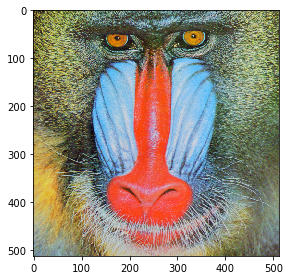

In [2]:
img = io.imread("baboon.png")
io.imshow(img) 
io.show()

In [3]:
img.shape

(512, 512, 3)

### Converting to CIELab

In [4]:
lab = color.rgb2lab(img)
lab.shape

(512, 512, 3)

In [5]:
#Define the threshold value to define the 0 or 1
threshold = lab[:,:,0].max() / 2

## Appling the mask

In [6]:
gray = color.rgb2gray(img)

In [7]:
#Set the luminance channel to be used
luminance = lab[:,:,0]

#Define the matriz with erro of each pixel
erro = np.zeros([luminance.shape[0], luminance.shape[1]])

#Output image
g = luminance.copy()

In [8]:
# luminance = gray

In [9]:
lab2 = lab.copy()

In [10]:
#loop to check all pixels of the image
for row in range(luminance.shape[0]-1):
    for collumn in range(luminance.shape[1]-1):
        if luminance[row][collumn] < threshold:
            g[row][collumn] = 0
        else:
            g[row][collumn] = 1
            
        erro[row][collumn] = luminance[row][collumn] - g[row][collumn] * 255
        
        #Applyig the mask
        luminance[row+1][collumn] = luminance[row+1][collumn] + (7/16) * erro[row+1][collumn]
        luminance[row-1][collumn-1] = luminance[row-1][collumn-1] + (3/16) * erro[row-1][collumn-1]
        luminance[row][collumn+1] = luminance[row][collumn+1] + (5/16) * erro[row][collumn+1]
        luminance[row+1][collumn+1] = luminance[row+1][collumn+1] + (1/16) * erro[row+1][collumn+1]

In [11]:
lab2[:,:,0] = luminance

F:\stiva\anaconda3\lib\site-packages\skimage\color\colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 4797 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


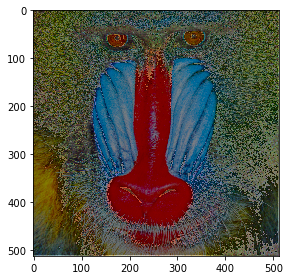

In [12]:
io.imshow(color.lab2rgb(lab2)) 
io.show()